In [94]:
import os
import unidecode
import string
import torch
import argparse
import subprocess
import re
import math
import matplotlib.pyplot as plt

## Data Loading and Preprocessing

In [4]:
# Directories
os.makedirs("data", exist_ok=True)
os.makedirs("models", exist_ok=True)

In [6]:
# Loading dataset
data_path = "data/cnus.txt"
with open(data_path, 'r', encoding='utf-8') as f:
    text = f.read()

In [62]:
# Data preprocessing
text = unidecode.unidecode(text) # convert to ASCII
text = text.lower() # convert to lowercase
text = text.translate(str.maketrans("", "", string.punctuation)) # remove special characters

# Saving cleaned data
path_clean = "data/sherlock_clean.txt"
with open(path_clean, 'w', encoding='utf-8') as f:
    f.write(text)

print("Preprocessed data saved in %s"%path_clean)

Preprocessed data saved in data/sherlock_clean.txt


## Training the Model

In [11]:
# Training
train_script = "train.py"

if os.path.exists(train_script):
    process = subprocess.Popen(
        f"python -u {train_script} {path_clean} --n_epochs 2000 --hidden_size 100 --n_layers 2 --learning_rate 0.01 --batch_size 100",
        shell=True,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    
    # Display output in real-time
    for line in iter(process.stdout.readline, ''):
        print(line, end="")  

    process.stdout.close()
    process.wait()
    
    print("training complete")
else:
    print("Error: train.py not found")

Training for 2000 epochs...
training complete


### Training Model 1
- epochs = 2000, hidden layers = 100
- python train.py data/sherlock_clean.txt --n_epochs 2000 --hidden_size 100 --n_layers 2 --learning_rate 0.01 --batch_size 100

In [150]:
with open("training_log.txt", "r") as file:
    log_data = file.readlines()
    print("".join(log_data))  # Print entire log content

# Extract loss values
loss_pattern = re.compile(r"([\d.]+)]$")
loss_values = [float(match.group(1)) for line in log_data if (match := loss_pattern.search(line))]

# Compute perplexity
perplexities = [math.exp(loss) for loss in loss_values]

Training for 2000 epochs...
 21s (100 5%) 1.6578]
Whard flant in which cong of knote arad out hich a they ever the i mars sai some enfourrimine for and  

 44s (200 10%) 1.5179]
Whing and the led the shall hile his still noth brich he shear was same which his will she long that t 

 6s (300 15%) 1.4058]
Wh making the
     thin i have me secrelans

     i am until he have that we small into this bootself  

 31s (400 20%) 1.3592]
Wh mr holment
     spoke and any with a room a little jow i simple

     up the balack it weair and ju 

 54s (500 25%) 1.3544]
Wh the owner
     think the lady then so silent this eat upon a father the stairs we have rest on a li 

 17s (600 30%) 1.3413]
Wh a man this interest in the hudgue the
     voice the death i had a she said the

     what is sunde 

 40s (700 35%) 1.3042]
Whe asked followed out
     onfording home but her earlat to coloorne he understand poice

     she pa 

 3s (800 40%) 1.2863]
Wh
     the great put sine and he restergain leave some 

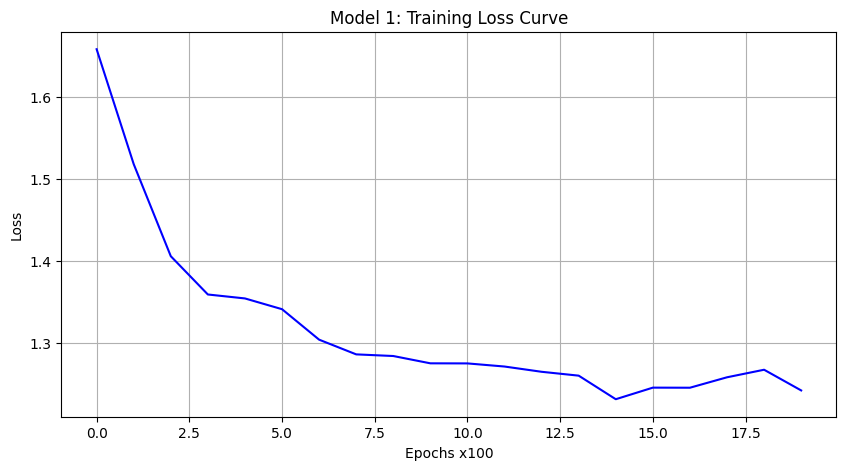

In [152]:
# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(loss_values, label="Loss", color="blue")
plt.xlabel("Epochs x100")
plt.ylabel("Loss")
plt.title("Model 1: Training Loss Curve")
plt.grid()
plt.show()

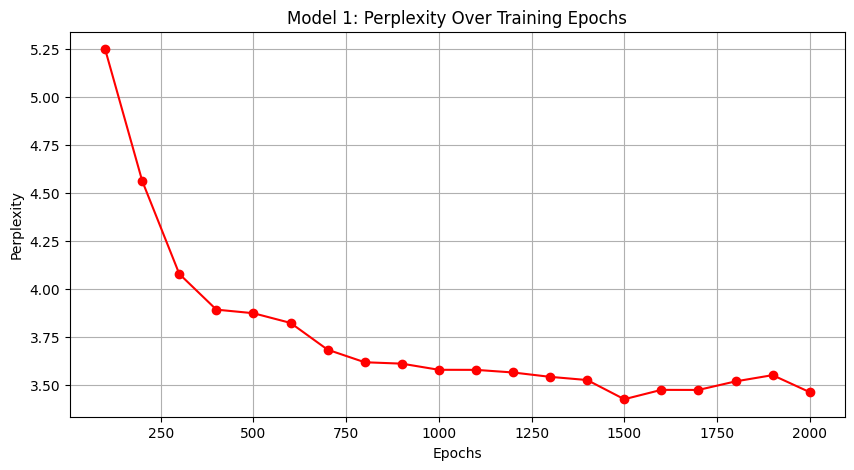

In [153]:
# Plot perplexity
epochs = [i * 100 for i in range(1, len(perplexities) + 1)] 

plt.figure(figsize=(10, 5))
plt.plot(epochs, perplexities, marker='o', linestyle='-', color='r', label='Perplexity')
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.title('Model 1: Perplexity Over Training Epochs')
plt.grid(True)
plt.show()

### Training Model 2
- increasing epochs to 5000
- python train.py data/sherlock_clean.txt --n_epochs 5000 --hidden_size 100 --n_layers 2 --learning_rate 0.01 --batch_size 100

In [157]:
with open("training_log2.txt", "r") as file:
    log_data = file.readlines()
    print("".join(log_data))  # Print entire log content

# Extract loss values
loss_pattern = re.compile(r"([\d.]+)]$")
loss_values2 = [float(match.group(1)) for line in log_data if (match := loss_pattern.search(line))]

# Compute perplexity
perplexities2 = [math.exp(loss) for loss in loss_values2]

Training for 5000 epochs...
 22s (100 2%) 1.7036]
What af that hit
     i a tant that in lemaint in the wack you man in
     the you reinsticomer have a 

 45s (200 4%) 1.5136]
Who abanticcbicked my of of
     and eefins to my one courceld whit stood i  was his hand not which
   

 10s (300 6%) 1.4382]
What in that was the mong tracted thinzly were out
     i to and by him he is not on it man a worse we 

 34s (400 8%) 1.4183]
What the people and upon in the little sturble to
     thur the sproducable that you done

     even t 

 57s (500 10%) 1.3968]
Whey foor bridled that
     ones on a coming departs to that  he had go firter to shere seem the hear
 

 20s (600 12%) 1.3690]
What he should broad watson postcrows how
     hand what i every sperfurtable how you sadly of the run 

 44s (700 14%) 1.3349]
Whores implase you to me which was the solds up life
     hars with a great a study the camin and mess 

 6s (800 16%) 1.3159]
What when the opinitiled were puttil in the convolded secu

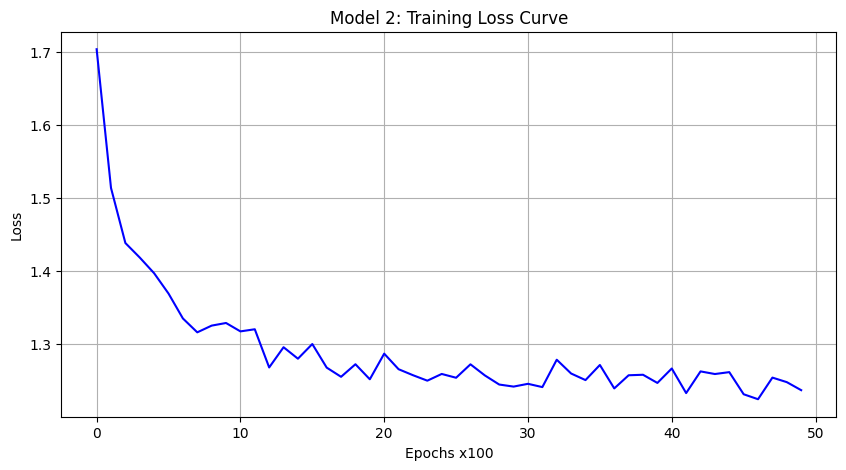

In [159]:
# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(loss_values2, label="Loss", color="blue")
plt.xlabel("Epochs x100")
plt.ylabel("Loss")
plt.title("Model 2: Training Loss Curve")
plt.grid()
plt.show()

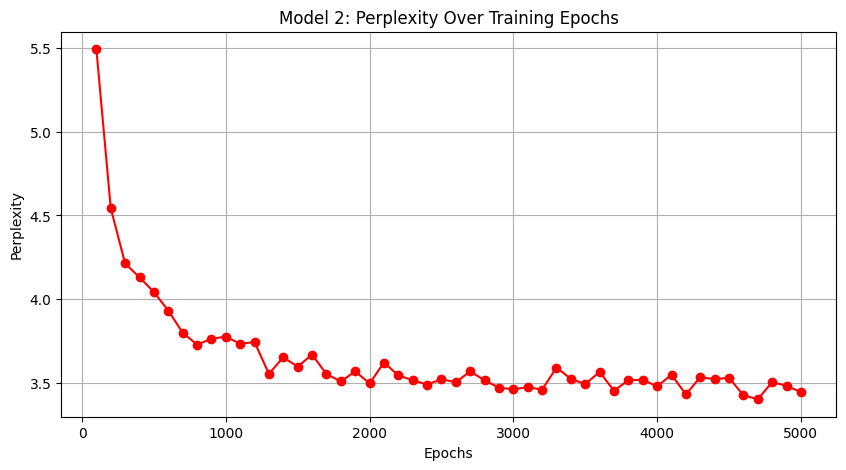

In [161]:
# Plot perplexity
epochs = [i * 100 for i in range(1, len(perplexities2) + 1)] 

plt.figure(figsize=(10, 5))
plt.plot(epochs, perplexities2, marker='o', linestyle='-', color='r', label='Perplexity')
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.title('Model 2: Perplexity Over Training Epochs')
plt.grid(True)
plt.show()

### Training Model 3
- increasing hidden layers to 256
- python train.py data/sherlock_clean.txt --n_epochs 5000 --hidden_size 256 --n_layers 2 --learning_rate 0.01 --batch_size 100

In [163]:
with open("training_log3.txt", "r") as file:
    log_data = file.readlines()
    print("".join(log_data))  # Print entire log content

# Extract loss values
loss_pattern = re.compile(r"([\d.]+)]$")
loss_values3 = [float(match.group(1)) for line in log_data if (match := loss_pattern.search(line))]

# Compute perplexity
perplexities3 = [math.exp(loss) for loss in loss_values3]

Training for 5000 epochs...
 20s (100 2%) 1.5883]
Whans to thee had cratsed

     hat inson and said to miss with our one in and the some and to mone so 

 49s (200 4%) 1.4301]
Whas there room and where is he in the she
     sembed jives a mult he said after and the barrance cap 

 20s (300 6%) 1.3627]
Which i am
        otherer and him nothing of the money
     the saw when had it minute another was al 

 50s (400 8%) 1.3068]
Wholomesent in yours not stright and see to for by were his replious
     feet some stand from a beaki 

 20s (500 10%) 1.3076]
Whand into lands with
     appearance we heard with the hands and him holmes and down when has not sai 

 50s (600 12%) 1.2814]
Whanges last we had come said the cabman he promise excepty in a man

     i had particulas weorn i da 

 20s (700 14%) 1.2554]
Whoused and
     such a facts its to the field for him and my assurmined a end the tinue was on the co 

 51s (800 16%) 1.2755]
Whand there was promises letters and in the triser from
 

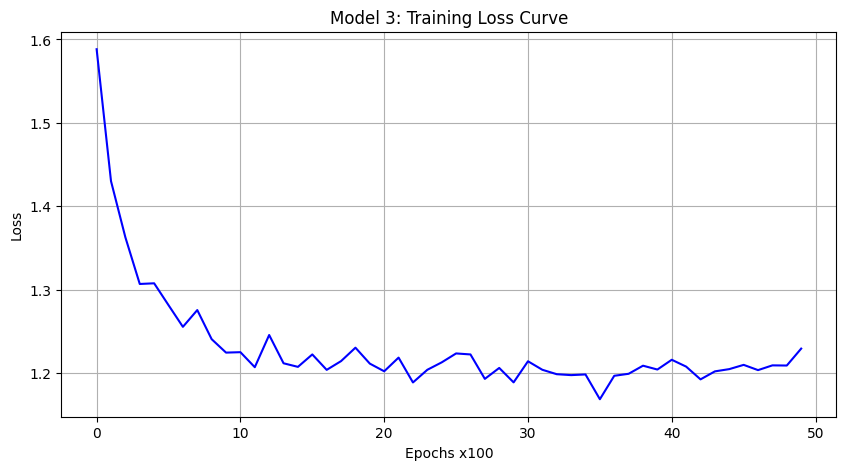

In [165]:
# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(loss_values3, label="Loss", color="blue")
plt.xlabel("Epochs x100")
plt.ylabel("Loss")
plt.title("Model 3: Training Loss Curve")
plt.grid()
plt.show()

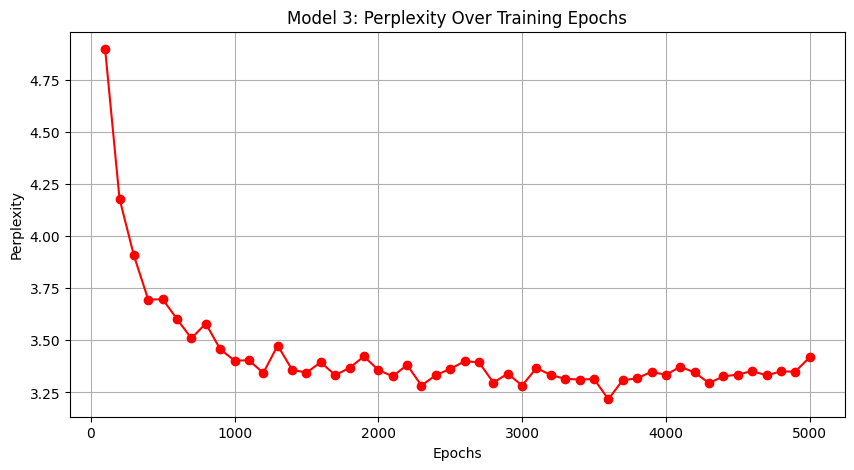

In [167]:
# Plot perplexity
epochs = [i * 100 for i in range(1, len(perplexities3) + 1)] 

plt.figure(figsize=(10, 5))
plt.plot(epochs, perplexities3, marker='o', linestyle='-', color='r', label='Perplexity')
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.title('Model 3: Perplexity Over Training Epochs')
plt.grid(True)
plt.show()

In [179]:
# Printing perplexities
print("Model 1 perplexity: " + str(perplexities[0]))
print("Model 2 perplexity: " + str(perplexities2[0]))
print("Model 3 perplexity: " + str(perplexities3[0]))

Model 1 perplexity: 5.247753078792966
Model 2 perplexity: 5.493689116120268
Model 3 perplexity: 4.895419637052021


## Generating New Text

### Model 1

In [75]:
# Generate text using the trained model
generated_script = "generate.py"
model_path = "models/sherlock_clean.pt"

if os.path.exists(generated_script) and os.path.exists(model_path):
    result = subprocess.run(
        ["python", generated_script, model_path, "--prime_str", "As he spoke", "--predict_len", "200", "--temperature", "0.8"],
        capture_output=True, text=True
    )
    print(result.stdout)  
else:
    print("Error: model file or generate.py not found")

As he spoke to induction drop was hear it is first
     bust that enough upon to anxieties of the lank i am one of
     screen and i am one the room a from her promed to by shiff to hear
     arrandy if he asked



### Model 2

In [77]:
model_path = "models/sherlock_clean_5000.pt"

if os.path.exists(generated_script) and os.path.exists(model_path):
    result = subprocess.run(
        ["python", generated_script, model_path, "--prime_str", "As he spoke", "--predict_len", "200", "--temperature", "0.8"],
        capture_output=True, text=True
    )
    print(result.stdout)  
else:
    print("Error: model file or generate.py not found")

As he spoke not secretor of the wife as now it was
     it there is not montage and bent a land our stapleton of mase an
     fire was dream and it was pipe to see not a village to that final such
     in an ene



### Model 3

In [79]:
model_path = "models/sherlock_clean_5000_256.pt"

if os.path.exists(generated_script) and os.path.exists(model_path):
    result = subprocess.run(
        ["python", generated_script, model_path, "--prime_str", "As he spoke", "--predict_len", "200", "--temperature", "0.8"],
        capture_output=True, text=True
    )
    print(result.stdout)  
else:
    print("Error: model file or generate.py not found")

As he spoke this time i knew so london being in a wall to see him

     i could amon with his my little watched in his man who has perfectly said without a fire we
     have saw at the table which is no terror a



## Evaluating Models

In [ ]:
model_path = "models/sherlock_clean_5000_256.pt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CharRNN(...)  # Use the same architecture as during training
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()